In [1]:
# Building a regression model. 

In [2]:
# loading a bioactivity data for building a regression modeL,

In [3]:
import pandas as pd

In [57]:
df3 = pd.read_csv('pic50aromatase.csv')

In [58]:
df3

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2.0,2.0,5.148742
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301030
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606
...,...,...,...,...,...,...,...,...
3063,CHEMBL5426889,CCCCOc1ccc(-c2ccn(C)n2)cc1,inactive,230.311,3.26600,0.0,3.0,4.629000
3064,CHEMBL356594,CCCCOc1ccc(-c2cc(C)[nH]n2)cc1,inactive,230.311,3.56402,1.0,2.0,4.796000
3065,CHEMBL5394720,CCCCOc1ccc(-c2nocc2C)cc1,intermediate,231.295,3.82892,0.0,3.0,5.509000
3066,CHEMBL5438879,N#Cc1ccccc1-c1cccc(Cn2cncn2)c1,active,260.300,2.86508,0.0,4.0,8.153972


In [6]:
# selecting only the canonical smiles and molecule chembl id

In [7]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('my_aromatase.smi', sep='\t', index=False, header=False)

In [8]:
import os
import pandas as pd

# Check if the file exists
if os.path.exists('molecule.smi'):
    print("File 'my_aromatase.smi' exists. File size:", os.path.getsize('molecule.smi'), "bytes")
    
    # Using pure Python to read first 5 lines
    print("\nFirst 5 lines using Python file reading:")
    with open('molecule.smi', 'r') as file:
        for i, line in enumerate(file):
            if i < 5:
                print(line.strip())
            else:
                break

File 'my_aromatase.smi' exists. File size: 191551 bytes

First 5 lines using Python file reading:
CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12	CHEMBL341591
C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43C)[C@@H]1CC[C@@H]2[C@H]1CN1	CHEMBL2111947
CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21	CHEMBL431859
CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21	CHEMBL113637
Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21	CHEMBL112021


In [9]:
#Simple line counting
with open('my_aromatase.smi', 'r') as file:
    line_count = sum(1 for line in file)
print(f"Number of lines in molecule.smi: {line_count}")

Number of lines in molecule.smi: 3068


In [10]:
df = pd.read_csv('my_aromatase.smi',sep=r'\s+', header=None, names=['SMILES', 'Name'], engine='python')

In [11]:
print('original shape:', df.shape)

original shape: (3068, 2)


In [12]:
df = df.dropna(how='all', axis=0)

In [13]:
df = df.dropna(how='all', axis=1)

In [14]:
df = df.dropna()

In [15]:
print('cleaned shape:', df.shape)

cleaned shape: (3068, 2)


In [16]:
df.to_csv('my2.2_aromatase_cleaned.smi', sep='\t', index=False, header=False)

In [17]:
# Split SMILES file into 3 parts

# File name
input_file = "My2.2_aromatase_cleaned.smi"

# Read all lines (each molecule is one line)
with open(input_file, "r") as f:
    smiles_lines = f.readlines()

# Total number of molecules
total = len(smiles_lines)
print(f"Total molecules: {total}")

# Calculate split sizes
part_size = total // 3
remainder = total % 3

# Generate output file names
output_files = ["part1.smi", "part2.smi", "part3.smi"]

# Write to 3 files
start = 0
for i, file in enumerate(output_files):
    # Add remainder (distribute extra molecules if not divisible by 3)
    end = start + part_size + (1 if i < remainder else 0)
    with open(file, "w") as out:
        out.writelines(smiles_lines[start:end])
    print(f"Saved {end - start} molecules to {file}")
    start = end

Total molecules: 3068
Saved 1023 molecules to part1.smi
Saved 1023 molecules to part2.smi
Saved 1022 molecules to part3.smi


In [18]:
import pandas as pd

In [19]:
#descriptors output part1.csv
df1 = pd.read_csv('descriptors output part1.csv')

In [20]:
df1 = df1.dropna(how='all', axis=0)

In [21]:
df1 = df1.dropna(how='all', axis=1)

In [22]:
print('cleaned shape:', df1.shape)

cleaned shape: (1023, 2283)


In [23]:
df1.to_csv('descriptors output part1_cleans.csv')

In [24]:
#descriptors_outputpart2.csv

In [25]:
df2 = pd.read_csv('descriptors_outputpart2.csv')

In [26]:
df2 = df2.dropna(how='all', axis=0)

In [27]:
df2 = df2.dropna(how='all', axis=1)

In [28]:
print('cleaned shape:', df2.shape)

cleaned shape: (1023, 2326)


In [29]:
df2.to_csv('descriptors output part2_cleans.csv')

In [30]:
#descriptors_outputpart2.csv

In [31]:
df3 = pd.read_csv('part3_descriptorspart3.csv')

In [32]:
df3 = df3.dropna(how='all', axis=0)

In [33]:
df3 = df3.dropna(how='all', axis=1)

In [34]:
print('cleaned shape:', df3.shape)

cleaned shape: (1021, 2326)


In [35]:
df3.to_csv('descriptors output part3_cleans.csv')

In [36]:
import pandas as pd

# Filenames exactly as uploaded (quotes handle spaces)
f1 = "descriptors output part1_cleans.csv"
f2 = "descriptors_outputpart2.csv"
f3 = "descriptors output part3_cleans.csv"

def read_clean(path, label):
    # Read as string to avoid dtype clashes; skip clearly bad lines if any
    df = pd.read_csv(path, dtype=str, on_bad_lines="skip")
    # Drop accidental index columns like "Unnamed: 0"
    df = df.loc[:, ~df.columns.str.contains(r"^Unnamed", case=False)]
    # Remove accidental header rows that got appended mid-file
    header_mask = (df.astype(str) == pd.Series(df.columns, index=df.columns)).all(axis=1)
    if header_mask.any():
        df = df.loc[~header_mask].copy()
    # Keep source for traceability (optional but useful)
    df.insert(0, "source_file", label)
    return df

# Read
df1 = read_clean(f1, "part1")
df2 = read_clean(f2, "part2")
df3 = read_clean(f3, "part3")

# Align columns by union so different orders/sets won’t break the merge
all_cols = sorted(set(df1.columns) | set(df2.columns) | set(df3.columns))
df1 = df1.reindex(columns=all_cols)
df2 = df2.reindex(columns=all_cols)
df3 = df3.reindex(columns=all_cols)

# Merge
merged = pd.concat([df1, df2, df3], ignore_index=True)

# Drop exact duplicate rows (keeps first)
before = len(merged)
merged = merged.drop_duplicates()
after = len(merged)

# OPTIONAL: if you have a unique ID column (e.g., "Name" or "Molecule"),
# you can deduplicate by that column instead of full-row:
# merged = merged.drop_duplicates(subset=["Name"])

# Save
out_file = "descriptors_merged.csv"
merged.to_csv(out_file, index=False)

print(f" Merged file saved: {out_file}")
print(f"Rows before dedup: {before} | after dedup: {after}")
print(f"Columns: {len(merged.columns)}")
merged.head()


 Merged file saved: descriptors_merged.csv
Rows before dedup: 3067 | after dedup: 3067
Columns: 2327


,AATS0e,AATS0i,AATS0m,AATS0p,AATS0s,AATS0v,AATS1e,AATS1i,AATS1m,AATS1p,...,piPC5,piPC6,piPC7,piPC8,piPC9,source_file,sumI,topoDiameter,topoRadius,topoShape
0,7.196456677966095,163.69974582103754,62.05994833898302,1.335092468978217,2.174905838041431,184.15267531786236,7.440001650793657,144.2283867421135,72.46068444444448,1.789699087555554,...,4.976733742420574,5.220355825078324,5.476463551931511,5.726847747587197,5.926926025970411,part1,41.66666666666666,12.0,6.0,1.0
1,7.207383928571423,163.6009882732628,62.77215541071426,1.3409344617860153,2.215525793650793,185.3450616632622,7.449072066666671,144.2224818872892,73.27574705000006,1.7955842315999986,...,4.976733742420574,5.209486152841421,5.480638923341991,5.736572297479192,5.934894195619588,part1,40.16666666666667,11.0,6.0,0.8333333333333334
2,7.621522688888884,161.17681966801624,230.73396542555025,1.783495426491797,3.8356900624904737,246.5520237555598,7.676957875000006,144.9354306057313,114.68488232990003,1.9763777477083329,...,6.25454970551514,6.641732768785855,7.126131233345729,7.567307299501276,7.818706782510687,part1,54.5648148148148,11.0,6.0,0.8333333333333334
3,7.579704285714283,161.94473825015433,91.74045340832784,1.6124114592209988,4.021825396825396,236.5912371450132,7.666587911111114,145.4212629584934,97.5283599741156,1.908226390666666,...,6.127551265854018,6.498352741864251,6.9881753193029095,7.412233456516927,7.649108375690921,part1,52.16666666666666,10.0,5.0,1.0
4,7.52425028205128,158.19627729089444,118.01451205128224,1.7560334994252291,2.594865151106578,250.71985954385397,7.661405380952384,144.303591211081,105.18804835714288,1.9896335466666664,...,5.990995687210356,6.307614490179894,6.806855286494145,7.263064055764347,7.531158748209716,part1,43.67901234567901,11.0,6.0,0.8333333333333334


In [37]:
merged.tail()

,AATS0e,AATS0i,AATS0m,AATS0p,AATS0s,AATS0v,AATS1e,AATS1i,AATS1m,AATS1p,...,piPC5,piPC6,piPC7,piPC8,piPC9,source_file,sumI,topoDiameter,topoRadius,topoShape
3062,7.435844685714289,163.1877180891138,76.75276985714281,1.4317381796366293,2.580952380952381,205.47894707585948,7.644031777777779,146.85110639561668,84.28709150000003,1.747507710555556,...,5.433176002994675,5.757224500532558,6.092581697411993,6.373559735190492,6.620406484320476,part3,34.0,12.0,6.0,1.0
3063,7.435844685714289,163.1877180891138,76.75276985714281,1.4317381796366293,2.6103174603174604,205.47894707585948,7.642115333333335,147.06373452210002,83.67703627777782,1.763391821388889,...,5.433176002994675,5.757224500532558,6.092581697411993,6.373559735190492,6.620406484320476,part3,34.16666666666667,12.0,6.0,1.0
3064,7.549593529411769,161.79010894374215,80.73831861764701,1.4441008053656772,2.8341503267973858,209.8163531460831,7.701991542857143,144.94355292198003,87.14520302857146,1.769233522,...,5.4108086477586514,5.732936664308774,6.12632318355462,6.360519571873137,6.488028803027412,part3,35.16666666666667,11.0,6.0,0.8333333333333334
3065,7.564886500000003,159.14630540534338,97.03759062499998,1.7124298393183752,4.050347222222221,253.82912668897413,7.686626588235294,145.07576276749413,103.37857005882356,1.983177403529412,...,5.853996845947653,6.140355885096981,6.605107611906891,6.962746415416585,7.346090851822937,part3,44.66666666666667,10.0,5.0,1.0
3066,7.564886500000003,159.14630540534338,97.03759062499998,1.7124298393183752,4.050347222222221,253.82912668897413,7.686626588235294,145.07576276749415,103.37857005882356,1.983177403529412,...,5.844268792289402,6.123862485115446,6.58782976219323,6.980555476728705,7.33128539448794,part3,44.66666666666667,11.0,6.0,0.8333333333333334


In [38]:
# Calculate fingerprint descriptors
#Calculate PaDEL descriptors

In [39]:
import pandas as pd

In [40]:
df4 = pd.read_csv('descriptors_merged.csv')

In [41]:
df4.head()

,AATS0e,AATS0i,AATS0m,AATS0p,AATS0s,AATS0v,AATS1e,AATS1i,AATS1m,AATS1p,...,piPC5,piPC6,piPC7,piPC8,piPC9,source_file,sumI,topoDiameter,topoRadius,topoShape
0,7.196457,163.699746,62.059948,1.335092,2.174906,184.152675,7.440002,144.228387,72.460684,1.789699,...,4.976734,5.220356,5.476464,5.726848,5.926926,part1,41.666667,12.0,6.0,1.000000
1,7.207384,163.600988,62.772155,1.340934,2.215526,185.345062,7.449072,144.222482,73.275747,1.795584,...,4.976734,5.209486,5.480639,5.736572,5.934894,part1,40.166667,11.0,6.0,0.833333
2,7.621523,161.176820,230.733965,1.783495,3.835690,246.552024,7.676958,144.935431,114.684882,1.976378,...,6.254550,6.641733,7.126131,7.567307,7.818707,part1,54.564815,11.0,6.0,0.833333
3,7.579704,161.944738,91.740453,1.612411,4.021825,236.591237,7.666588,145.421263,97.528360,1.908226,...,6.127551,6.498353,6.988175,7.412233,7.649108,part1,52.166667,10.0,5.0,1.000000
4,7.524250,158.196277,118.014512,1.756033,2.594865,250.719860,7.661405,144.303591,105.188048,1.989634,...,5.990996,6.307614,6.806855,7.263064,7.531159,part1,43.679012,11.0,6.0,0.833333


In [42]:
#All column names
columns = df4.columns.tolist()

In [43]:
#PubChem Fingerprints (columns containing 'PubChemFP')
pubchem_fp_cols = [col for col in  columns
if 'PubchemFP' in col]

In [44]:
# 2D Descriptors (everything else except Name and PubChemFPs)
desc_cols = [col for col in columns if col not in pubchem_fp_cols and col != 'Name']

In [45]:
#create separate DataFrame 
df_pubchem_fp = df4[['Name'] + pubchem_fp_cols]
df_2d = df4[['Name'] + desc_cols]

In [46]:
print(df_pubchem_fp.columns[:30])

Index(['Name', 'PubchemFP0', 'PubchemFP1', 'PubchemFP10', 'PubchemFP100',
       'PubchemFP101', 'PubchemFP102', 'PubchemFP103', 'PubchemFP104',
       'PubchemFP105', 'PubchemFP106', 'PubchemFP107', 'PubchemFP108',
       'PubchemFP109', 'PubchemFP11', 'PubchemFP110', 'PubchemFP111',
       'PubchemFP112', 'PubchemFP113', 'PubchemFP114', 'PubchemFP115',
       'PubchemFP116', 'PubchemFP117', 'PubchemFP118', 'PubchemFP119',
       'PubchemFP12', 'PubchemFP120', 'PubchemFP121', 'PubchemFP122',
       'PubchemFP123'],
      dtype='object')


In [47]:
#Save them separately 
df_pubchem_fp.to_csv('pubchem-fingerprints aromates.csv', 
                     index=False)
df_2d.to_csv('descriptors_2d aromates.csv', index=False)


In [48]:
import pandas as pd

In [49]:
df5 = pd.read_csv('pubchem-fingerprints aromates.csv')

In [50]:
df5

,Name,PubchemFP0,PubchemFP1,PubchemFP10,PubchemFP100,PubchemFP101,PubchemFP102,PubchemFP103,PubchemFP104,PubchemFP105,...,PubchemFP90,PubchemFP91,PubchemFP92,PubchemFP93,PubchemFP94,PubchemFP95,PubchemFP96,PubchemFP97,PubchemFP98,PubchemFP99
0,CHEMBL341591,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL2111947,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL431859,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL113637,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL112021,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3062,CHEMBL5426889,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3063,CHEMBL356594,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3064,CHEMBL5394720,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3065,CHEMBL5438879,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
#Preparing the X and Y Data Matrices
#For X data matrix

In [52]:
df5_X = pd.read_csv('pubchem-fingerprints aromates.csv')

In [53]:
df5_X

,Name,PubchemFP0,PubchemFP1,PubchemFP10,PubchemFP100,PubchemFP101,PubchemFP102,PubchemFP103,PubchemFP104,PubchemFP105,...,PubchemFP90,PubchemFP91,PubchemFP92,PubchemFP93,PubchemFP94,PubchemFP95,PubchemFP96,PubchemFP97,PubchemFP98,PubchemFP99
0,CHEMBL341591,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL2111947,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL431859,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL113637,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL112021,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3062,CHEMBL5426889,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3063,CHEMBL356594,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3064,CHEMBL5394720,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3065,CHEMBL5438879,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df5_X = df5_X.drop(columns=['Name'])
df5_X

,PubchemFP0,PubchemFP1,PubchemFP10,PubchemFP100,PubchemFP101,PubchemFP102,PubchemFP103,PubchemFP104,PubchemFP105,PubchemFP106,...,PubchemFP90,PubchemFP91,PubchemFP92,PubchemFP93,PubchemFP94,PubchemFP95,PubchemFP96,PubchemFP97,PubchemFP98,PubchemFP99
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3062,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3063,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3064,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3065,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
#Y variable
#Convert IC50 to pIC50

In [59]:
df5_Y = df3['pIC50']
df5_Y

0       5.148742
1       4.301030
2       6.623423
3       7.244125
4       7.267606
          ...   
3063    4.629000
3064    4.796000
3065    5.509000
3066    8.153972
3067    1.000000
Name: pIC50, Length: 3068, dtype: float64

In [ ]:
# Combining X and Y variable

In [60]:
dataset3 = pd.concat([df5_X,df5_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP10,PubchemFP100,PubchemFP101,PubchemFP102,PubchemFP103,PubchemFP104,PubchemFP105,PubchemFP106,...,PubchemFP91,PubchemFP92,PubchemFP93,PubchemFP94,PubchemFP95,PubchemFP96,PubchemFP97,PubchemFP98,PubchemFP99,pIC50
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.148742
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.301030
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.623423
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.244125
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.267606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.629000
3064,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.796000
3065,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.509000
3066,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.153972


In [61]:
print("Original DataFrame shape:", dataset3.shape)


Original DataFrame shape: (3068, 882)


In [62]:
cleaned_df = dataset3.dropna()
print("After removing rows with NaN values:", cleaned_df.shape)


After removing rows with NaN values: (3066, 882)


In [63]:
cleaned_df

,PubchemFP0,PubchemFP1,PubchemFP10,PubchemFP100,PubchemFP101,PubchemFP102,PubchemFP103,PubchemFP104,PubchemFP105,PubchemFP106,...,PubchemFP91,PubchemFP92,PubchemFP93,PubchemFP94,PubchemFP95,PubchemFP96,PubchemFP97,PubchemFP98,PubchemFP99,pIC50
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.148742
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.301030
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.623423
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.244125
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.267606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3062,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.705999
3063,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.629000
3064,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.796000
3065,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.509000


In [64]:

cleaned_df.to_csv('aromatase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

In [65]:
# Regression Models with Random Forest

In [66]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [67]:
df7 = pd.read_csv('aromatase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [68]:
#Input features
#The aromatase data set contains 881 input features and 1 output variable (pIC50 values).

In [69]:
X = df7.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP10,PubchemFP100,PubchemFP101,PubchemFP102,PubchemFP103,PubchemFP104,PubchemFP105,PubchemFP106,...,PubchemFP90,PubchemFP91,PubchemFP92,PubchemFP93,PubchemFP94,PubchemFP95,PubchemFP96,PubchemFP97,PubchemFP98,PubchemFP99
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3061,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3062,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3063,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3064,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
# Output features
Y = df7.pIC50
Y

0       5.148742
1       4.301030
2       6.623423
3       7.244125
4       7.267606
          ...   
3061    5.705999
3062    4.629000
3063    4.796000
3064    5.509000
3065    8.153972
Name: pIC50, Length: 3066, dtype: float64

In [71]:
#examine the data dimension
X.shape

(3066, 881)

In [72]:
Y.shape

(3066,)

In [73]:
#Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [74]:
X.shape

(3066, 158)

In [75]:
#Data split (80/20 ratio)

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [77]:
X_train.shape, Y_train.shape

((2452, 158), (2452,))

In [78]:
X_test.shape, Y_test.shape

((614, 158), (614,))

In [79]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [80]:
Y_lr_train_pred = lr.predict(X_train)
Y_lr_test_pred = lr.predict(X_test)

In [81]:
#Model performance

In [82]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(Y_train, Y_lr_train_pred)
lr_train_r2 = r2_score(Y_train, Y_lr_train_pred)

lr_test_mse = mean_squared_error(Y_test, Y_lr_test_pred)
lr_test_r2 = r2_score(Y_test, Y_lr_test_pred)

In [83]:
print(lr_train_mse)

0.9558712878436197


In [84]:
lr_results = pd.DataFrame(['Linear regression',lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()

lr_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

In [85]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.955871,0.451995,1.22662,0.321836


In [156]:
Y_pred = lr.predict(X_test)

In [157]:
print(Y_pred[:10])

[6.42482721 6.17578292 5.35948822 5.21234675 6.41139551 6.65241923
 6.27318599 4.9010727  8.87031357 6.35125964]


In [86]:
#Building a Regression Model using Random Forest

In [87]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=42)
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [88]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

In [89]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(Y_train, y_rf_train_pred)
rf_train_r2 = r2_score(Y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(Y_test, y_rf_test_pred)
rf_test_r2 = r2_score(Y_test, y_rf_test_pred)


In [90]:
rf_results = pd.DataFrame(['Random forest',rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()

rf_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

In [91]:
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,0.411121,0.764302,1.064221,0.411622


In [92]:
Y_pred = rf.predict(X_test)

In [93]:
print(Y_pred[:10])


[6.95618497 6.28699674 6.47270374 5.34462924 5.50275814 6.79359497
 7.21455216 4.63918576 5.8740507  6.32038352]


In [94]:
print("Total predictions:", len(Y_pred))

Total predictions: 614


In [95]:
pd.concat([lr_results, rf_results])

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.955871,0.451995,1.22662,0.321836
0,Random forest,0.411121,0.764302,1.064221,0.411622


In [96]:
#Scatter Plot of Experimental vs Predicted pIC50 Values

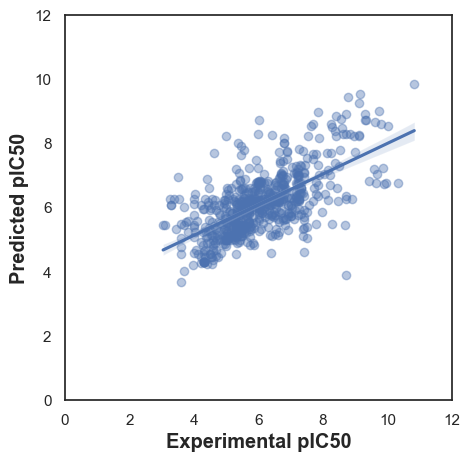

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)



plt.show()

In [98]:
from sklearn.tree import ExtraTreeRegressor

et = ExtraTreeRegressor(random_state=42)
et.fit(X_train, Y_train)

ExtraTreeRegressor(random_state=42)

In [99]:
y_et_train_pred = et.predict(X_train)
y_et_test_pred = et.predict(X_test)

In [100]:
from sklearn.metrics import mean_squared_error, r2_score

et_train_mse = mean_squared_error(Y_train, y_et_train_pred)
et_train_r2 = r2_score(Y_train, y_et_train_pred)

et_test_mse = mean_squared_error(Y_test, y_et_test_pred)
et_test_r2 = r2_score(Y_test, y_et_test_pred)

In [175]:
et1_results = pd.DataFrame(['ExtraTreeRegressor1', et_train_mse, et_train_r2, et_test_mse, et_test_r2]).transpose()

et1_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

In [176]:
et1_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,ExtraTreeRegressor1,0.782579,0.551344,1.061522,0.413114


In [158]:
Y_pred = et.predict(X_test)

In [104]:
from sklearn.ensemble import ExtraTreesRegressor

# 100 trees in an ensemble
et_ensemble = ExtraTreesRegressor(
    n_estimators=100, 
    max_depth=2, 
    random_state=42
)
et_ensemble.fit(X_train, Y_train)


ExtraTreesRegressor(max_depth=2, random_state=42)

In [105]:
y_et_train_pred = et.predict(X_train)
y_et_test_pred = et.predict(X_test)

In [106]:
from sklearn.metrics import mean_squared_error, r2_score

et_train_mse = mean_squared_error(Y_train, y_et_train_pred)
et_train_r2 = r2_score(Y_train, y_et_train_pred)

et_test_mse = mean_squared_error(Y_test, y_et_test_pred)
et_test_r2 = r2_score(Y_test, y_et_test_pred)

In [198]:
et2_results = pd.DataFrame(['ExtraTreesRegressor2', et_train_mse, et_train_r2, et_test_mse, et_test_r2]).transpose()

et2_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

In [199]:
et2_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,ExtraTreesRegressor2,0.782579,0.551344,1.061522,0.413114


In [159]:
Y_pred = et.predict(X_test)

In [109]:
# Import SGDRegressor
from sklearn.linear_model import SGDRegressor

SGDR = SGDRegressor(random_state=42)
SGDR.fit(X_train, Y_train)


SGDRegressor(random_state=42)

In [110]:
y_SGDR_train_pred = SGDR.predict(X_train)
y_SGDR_test_pred = SGDR.predict(X_test)

In [111]:
from sklearn.metrics import mean_squared_error, r2_score

SGDR_train_mse = mean_squared_error(Y_train, y_SGDR_train_pred)
SGDR_train_r2 = r2_score(Y_train, y_SGDR_train_pred)

SGDR_test_mse = mean_squared_error(Y_test, y_SGDR_test_pred)
SGDR_test_r2 = r2_score(Y_test, y_SGDR_test_pred)

In [179]:
SGDR_results = pd.DataFrame(['SGDRegressor', SGDR_train_mse, SGDR_train_r2, SGDR_test_mse, SGDR_test_r2]).transpose()

SGDR_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

In [180]:
SGDR_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,SGDRegressor,1.039084,0.404288,1.221255,0.324802


In [160]:
Y_pred = SGDR.predict(X_test)

In [115]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor(random_state=42)
GBR.fit(X_train, Y_train)


GradientBoostingRegressor(random_state=42)

In [116]:
y_GBR_train_pred = GBR.predict(X_train)
y_GBR_test_pred = GBR.predict(X_test)

In [117]:
from sklearn.metrics import mean_squared_error, r2_score

GBR_train_mse = mean_squared_error(Y_train, y_GBR_train_pred)
GBR_train_r2 = r2_score(Y_train, y_GBR_train_pred)

GBR_test_mse = mean_squared_error(Y_test, y_SGDR_test_pred)
GBR_test_r2 = r2_score(Y_test, y_GBR_test_pred)

In [181]:
GBR_results = pd.DataFrame(['GradientBoostingRegressor', GBR_train_mse, GBR_train_r2, GBR_test_mse, GBR_test_r2]).transpose()

GBR_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

In [182]:
GBR_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,GradientBoostingRegressor,0.841112,0.517786,1.221255,0.412216


In [161]:
Y_pred = GBR.predict(X_test)

In [120]:
pip install xgboost

In [121]:
from xgboost import XGBRegressor
XGBR = XGBRegressor(
    n_estimators=100,   # number of boosting rounds (trees)
    learning_rate=0.1,  # step size shrinkage
    max_depth=3,        # depth of each tree
    random_state=42,
    objective='reg:squarederror'  # loss function for regression
)

XGBR.fit(X_train, Y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [122]:
y_XGBR_train_pred = XGBR.predict(X_train)
y_XGBR_test_pred = XGBR.predict(X_test)

In [123]:
from sklearn.metrics import mean_squared_error, r2_score

XGBR_train_mse = mean_squared_error(Y_train, y_XGBR_train_pred)
XGBR_train_r2 = r2_score(Y_train, y_XGBR_train_pred)

XGBR_test_mse = mean_squared_error(Y_test, y_XGBR_test_pred)
XGBR_test_r2 = r2_score(Y_test, y_XGBR_test_pred)

In [183]:
XGBR_results = pd.DataFrame(['XGBRegressor', XGBR_train_mse, XGBR_train_r2, XGBR_test_mse, XGBR_test_r2]).transpose()

XGBR_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

In [184]:
XGBR_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,XGBRegressor,0.841027,0.517836,1.071632,0.407524


In [162]:
Y_pred = XGBR.predict(X_test)

In [126]:
#sklearn.neighbors.KNeighborsRegressor

from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor(n_neighbors=5) 
KNR.fit(X_train, Y_train)

KNeighborsRegressor()

In [127]:
y_KNR_train_pred = KNR.predict(X_train)
y_KNR_test_pred = KNR.predict(X_test)

In [128]:
from sklearn.metrics import mean_squared_error, r2_score

KNR_train_mse = mean_squared_error(Y_train, y_KNR_train_pred)
KNR_train_r2 = r2_score(Y_train, y_KNR_train_pred)

KNR_test_mse = mean_squared_error(Y_test, y_KNR_test_pred)
KNR_test_r2 = r2_score(Y_test, y_KNR_test_pred)

In [185]:
KNR_results = pd.DataFrame(['KNeighborsRegressor', KNR_train_mse, KNR_train_r2, KNR_test_mse, KNR_test_r2]).transpose()

KNR_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

In [186]:
KNR_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,KNeighborsRegressor,0.694472,0.601856,1.113608,0.384317


In [163]:
Y_pred = KNR.predict(X_test)

In [131]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(max_iter=1000, random_state=42)

mlp = MLPRegressor(hidden_layer_sizes=(100,), random_state=42)

# Fit the model
mlp.fit(X_train, Y_train)


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(random_state=42)

In [132]:
y_mlp_train_pred = mlp.predict(X_train)
y_mlp_test_pred = mlp.predict(X_test)

In [133]:
from sklearn.metrics import mean_squared_error, r2_score

mlp_train_mse = mean_squared_error(Y_train, y_mlp_train_pred)
mlp_train_r2 = r2_score(Y_train, y_mlp_train_pred)

mlp_test_mse = mean_squared_error(Y_test, y_mlp_test_pred)
mlp_test_r2 = r2_score(Y_test, y_mlp_test_pred)

In [187]:
mlp_results = pd.DataFrame(['MLPRegressor', mlp_train_mse, mlp_train_r2, mlp_test_mse, mlp_test_r2]).transpose()

mlp_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

In [188]:
mlp_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,MLPRegressor,0.665769,0.618312,1.134329,0.372861


In [164]:
Y_pred = mlp.predict(X_test)

In [136]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=2, random_state=42)
dt = DecisionTreeRegressor()
dt.fit(X_train, Y_train)


DecisionTreeRegressor()

In [137]:
y_dt_train_pred = dt.predict(X_train)
y_dt_test_pred = dt.predict(X_test)

In [138]:
from sklearn.metrics import mean_squared_error, r2_score

dt_train_mse = mean_squared_error(Y_train, y_dt_train_pred)
dt_train_r2 = r2_score(Y_train, y_dt_train_pred)

dt_test_mse = mean_squared_error(Y_test, y_dt_test_pred)
dt_test_r2 = r2_score(Y_test, y_dt_test_pred)

In [189]:
dt_results = pd.DataFrame(['DecisionTreeRegressor', dt_train_mse, dt_train_r2, dt_test_mse, dt_test_r2]).transpose()

dt_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

In [190]:
dt_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,DecisionTreeRegressor,0.358851,0.794269,1.446381,0.200336


In [165]:
Y_pred = dt.predict(X_test)

In [141]:
from sklearn.svm import LinearSVR

lsvr = LinearSVR(random_state=42, max_iter=1000)
lsvr = LinearSVR(max_iter=1000)
lsvr.fit(X_train, Y_train)


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR()

In [142]:
y_lsvr_train_pred = lsvr.predict(X_train)
y_lsvr_test_pred = lsvr.predict(X_test)

In [143]:
from sklearn.metrics import mean_squared_error, r2_score

lsvr_train_mse = mean_squared_error(Y_train, y_lsvr_train_pred)
lsvr_train_r2 = r2_score(Y_train, y_lsvr_train_pred)

lsvr_test_mse = mean_squared_error(Y_test, y_lsvr_test_pred)
lsvr_test_r2 = r2_score(Y_test, y_lsvr_test_pred)

In [191]:
lsvr_results = pd.DataFrame(['LinearSVR', lsvr_train_mse, lsvr_train_r2, lsvr_test_mse, lsvr_test_r2]).transpose()

lsvr_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

In [192]:
lsvr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,LinearSVR,1.02114,0.414576,1.214455,0.328562


In [166]:
Y_pred = lsvr.predict(X_test)

In [146]:
from sklearn.svm import SVR

svr = SVR(kernel='linear', C=1.0)
svr = SVR(kernel='rbf', C=1.0, gamma='scale')
svr.fit(X_train, Y_train)


SVR()

In [147]:
y_svr_train_pred = svr.predict(X_train)
y_svr_test_pred = svr.predict(X_test)

In [148]:
from sklearn.metrics import mean_squared_error, r2_score

svr_train_mse = mean_squared_error(Y_train, y_svr_train_pred)
svr_train_r2 = r2_score(Y_train, y_svr_train_pred)

svr_test_mse = mean_squared_error(Y_test, y_svr_test_pred)
svr_test_r2 = r2_score(Y_test, y_svr_test_pred)

In [193]:
svr_results = pd.DataFrame(['SVR', svr_train_mse, svr_train_r2, svr_test_mse, svr_test_r2]).transpose()

svr_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

In [194]:
svr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,SVR,0.782579,0.551344,1.061522,0.413114


In [167]:
Y_pred = svr.predict(X_test)

In [151]:
from sklearn.tree import ExtraTreeRegressor

et = ExtraTreeRegressor(max_depth=2, random_state=42)
et = ExtraTreeRegressor()
et.fit(X_train, Y_train)


ExtraTreeRegressor()

In [152]:
y_et_train_pred = svr.predict(X_train)
y_et_test_pred = svr.predict(X_test)

In [153]:
from sklearn.metrics import mean_squared_error, r2_score

et_train_mse = mean_squared_error(Y_train, y_et_train_pred)
et_train_r2 = r2_score(Y_train, y_et_train_pred)

et_test_mse = mean_squared_error(Y_test, y_et_test_pred)
et_test_r2 = r2_score(Y_test, y_et_test_pred)

In [195]:
et3_results = pd.DataFrame(['ExtraTreeRegressor3', et_train_mse, et_train_r2, et_test_mse, et_test_r2]).transpose()

et3_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

In [196]:
et3_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,ExtraTreeRegressor3,0.782579,0.551344,1.061522,0.413114


In [169]:
Y_pred = et.predict(X_test)

In [202]:
pd.concat([lr_results, rf_results, et1_results, et2_results, SGDR_results, GBR_results, XGBR_results, KNR_results, mlp_results, dt_results, lsvr_results, 
           svr_results, et3_results],ignore_index=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.955871,0.451995,1.22662,0.321836
1,Random forest,0.411121,0.764302,1.064221,0.411622
2,ExtraTreeRegressor1,0.782579,0.551344,1.061522,0.413114
3,ExtraTreesRegressor2,0.782579,0.551344,1.061522,0.413114
4,SGDRegressor,1.039084,0.404288,1.221255,0.324802
5,GradientBoostingRegressor,0.841112,0.517786,1.221255,0.412216
6,XGBRegressor,0.841027,0.517836,1.071632,0.407524
7,KNeighborsRegressor,0.694472,0.601856,1.113608,0.384317
8,MLPRegressor,0.665769,0.618312,1.134329,0.372861
9,DecisionTreeRegressor,0.358851,0.794269,1.446381,0.200336


In [204]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Example with Random Forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)

# 5-fold cross validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf, X, Y, cv=cv, scoring='r2')

print("Cross-Validation R2 Scores:", scores)
print("Mean R2:", np.mean(scores))


Cross-Validation R2 Scores: [0.4280792  0.45263931 0.48845307 0.52427793 0.45117951]
Mean R2: 0.4689258062516277


In [206]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

params = {
    'n_estimators': [100, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1]
}

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
grid_search_xgb = GridSearchCV(xgb, params, cv=5, scoring='r2', n_jobs=-1)
grid_search_xgb.fit(X, Y)

print("Best XGB params:", grid_search_xgb.best_params_)
print("Best XGB CV R2:", grid_search_xgb.best_score_)


Best XGB params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}
Best XGB CV R2: 0.23119015519465164


In [208]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X, Y)

print("Best parameters:", grid_search.best_params_)
print("Best CV R2:", grid_search.best_score_)


Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Best CV R2: 0.1313335319748175
